In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from matplotlib import rc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold

In [56]:
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings; warnings.simplefilter('ignore')

In [57]:
columns = ["facidity", "vacidity", "citric", "sugar", "chlorides", "fsulfur", 
               "tsulfur", "density", "pH", "sulphates", "alcohol", "quality"]
red=pd.read_csv("~\Desktop\BigDataAnalysis\AssignmentSupervised/winequality-red.csv",names=columns,sep=";", skiprows=1)
white=pd.read_csv("~/Desktop/winequality-white.csv",names=columns,sep=";", skiprows=1)

In [58]:
 red["color"] = 1
 white["color"] = 0
 wines = pd.concat([white, red])

In [59]:
X = wines.iloc[:,:13].values
y_quality = wines.iloc[:,11].values
y_type = wines.iloc[:,12].values
y_level = wines.iloc[:,10].values

In [60]:
X_level = wines.loc[:,wines.columns !="alcohol"].values


In [61]:
from sklearn.linear_model import Lasso
X_level = wines.loc[:,wines.columns !="alcohol"].values
y_level = wines.iloc[:,10].values
X_train, X_test, y_train, y_test = train_test_split(X_level, y_level, random_state=42)
lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.10
Test set score: 0.10
Number of features used: 2


Training set score: 0.10
Test set score: 0.10
Number of features used: 2

In [62]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.42
Test set score: 0.44
Number of features used: 11


Training set score: 0.42
Test set score: 0.44
Number of features used: 11

In [63]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.81
Test set score: 0.84
Number of features used: 11


Training set score: 0.81
Test set score: 0.84
Number of features used: 11

In [64]:
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.82
Test set score: 0.85
Number of features used: 12


Training set score: 0.82
Test set score: 0.85
Number of features used: 12

In [65]:
#Ridge regression classifier

In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.43
Test set score: 0.44


Training set score: 0.43
Test set score: 0.44

In [67]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.41
Test set score: 0.42


Training set score: 0.41
Test set score: 0.42

In [68]:
ridge01 = Ridge(alpha=.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.69


Training set score: 0.67
Test set score: 0.69

In [69]:
ridge001 = Ridge(alpha=.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.84


Training set score: 0.81
Test set score: 0.84

In [70]:
ridge0001 = Ridge(alpha=.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.85


Training set score: 0.82
Test set score: 0.85

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [72]:
from sklearn.linear_model import Ridge

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_level, y_level, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 3654 size of validation set: 1218 size of test set: 1625



In [ ]:
Size of training set: 3654 size of validation set: 1218 size of test set: 1625

In [73]:
best_score = 0
for alpha in [0.0001, 0.001, 0.01, 1, 10]:
        # for each combination of parameters, train an SVC
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = ridge.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            print("Best score: {:.2f}".format(best_score))
            print("Best parameters: {}".format(best_parameters))

Best score: 0.82
Best parameters: {'alpha': 0.0001}


Best score: 0.82
Best parameters: {'alpha': 0.0001}

In [74]:
param_grid = {'alpha': [0.0001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.84
Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.80

Best estimator:
Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


Test set score: 0.84
Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.80

Best estimator:
Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


Here it shows best test score is .84 against hyperperameter value .0001 which is better than other perameter values

In [75]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0056,4.586789e-03,0.001600,4.898633e-04,0.0001,{'alpha': 0.0001},0.855066,0.560507,0.844509,0.857885,0.868461,0.797266,0.118645,1
1,0.0020,3.568323e-07,0.001599,4.894540e-04,0.01,{'alpha': 0.01},0.633829,0.543274,0.606457,0.635226,0.641630,0.612075,0.036465,2
2,0.0024,4.899015e-04,0.001200,4.000438e-04,0.1,{'alpha': 0.1},0.480475,0.410748,0.449258,0.482661,0.487458,0.462113,0.029002,3
3,0.0016,4.895139e-04,0.001000,6.289914e-07,1,{'alpha': 1},0.450191,0.382560,0.426508,0.458312,0.459140,0.435336,0.028910,4
4,0.0020,1.154301e-06,0.001000,1.211955e-06,10,{'alpha': 10},0.420851,0.355343,0.412086,0.437118,0.430049,0.411084,0.029126,5


In [76]:
scores = np.array(results.mean_test_score)


In [77]:
#binary classification
#Multinomial Naive Bayes (MNB) classification

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
X_bin = wines.loc[:,wines.columns !="color"].values
#X_bin = wines.iloc[:,:12].values
y_bin = wines.iloc[:,12].values

In [80]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


Accuracy on training set: 1.000
Accuracy on test set: 0.985

In [81]:
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
             pre_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.98
Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score: 0.99

Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


Test set score: 0.98
Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score: 0.99

Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [85]:
from sklearn.ensemble import RandomForestClassifier
X_mul = wines.loc[:,wines.columns !="quality"].values
y_mul = wines.iloc[:,11].values
X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.687


Accuracy on training set: 1.000
Accuracy on test set: 0.687

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid= {'n_estimators':[5,10,100]}
grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.69
Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.67

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Test set score: 0.69
Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.67

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
#•For your binary classification problem, use gridsearch and cross-validation with SVC. 
#What is the best kernel? Print the heat map of mean cross-validation score 
#(hint: use the mglearn library), 
#the ROC curve and report the AUC value.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [89]:
X_bin = wines.loc[:,wines.columns !="color"].values
y_bin = wines.iloc[:,12].values

In [90]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_bin, y_bin, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))



Size of training set: 3654 size of validation set: 1218 size of test set: 1625



In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.98
Best parameters: {'C': 120, 'gamma': 0.001}
Best cross-validation score: 0.98

Best estimator:
SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Test set score: 0.98
Best parameters: {'C': 120, 'gamma': 0.001}
Best cross-validation score: 0.98

Best estimator:
SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.284583,0.005462,0.054205,0.003778,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.753762,0.753762,0.753762,0.753762,0.754795,0.753968,0.000413,24
1,0.419565,0.004482,0.051997,0.002099,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.753762,0.753762,0.753762,0.753762,0.754795,0.753968,0.000413,24
2,0.537968,0.020424,0.079403,0.002870,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.753762,0.753762,0.753762,0.753762,0.754795,0.753968,0.000413,24
3,0.498569,0.003498,0.098194,0.000400,0.001,1,"{'C': 0.001, 'gamma': 1}",0.753762,0.753762,0.753762,0.753762,0.754795,0.753968,0.000413,24
4,0.676350,0.007505,0.153982,0.003286,0.001,10,"{'C': 0.001, 'gamma': 10}",0.753762,0.753762,0.753762,0.753762,0.754795,0.753968,0.000413,24


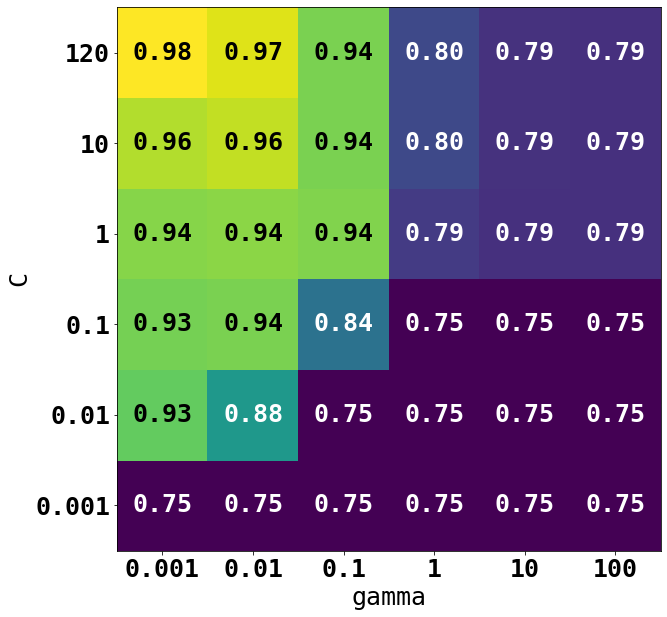

In [93]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [94]:
#Evaluation Metrics and Scoring

In [95]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 10]

In [ ]:
# We test the SVC classifier with two type of kernels.
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

# Precision-recall curves and ROC curves

In [96]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_bin = wines.loc[:,wines.columns !="color"].values
y_bin = wines.iloc[:,12].values

In [98]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_bin, y_bin, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 3654 size of validation set: 1218 size of test set: 1625



In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])

In [100]:
def plot_pre_rec():
    plt.plot(precision, recall, label="svc")
    plt.plot(precision[close_zero], recall[close_zero], 'o',
             label="threshold zero svc", fillstyle="none", c='k', mew=2)
    plt.plot(precision_rf, recall_rf, label="rf")
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
             label="threshold 0.5 rf", fillstyle="none", mew=2)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")

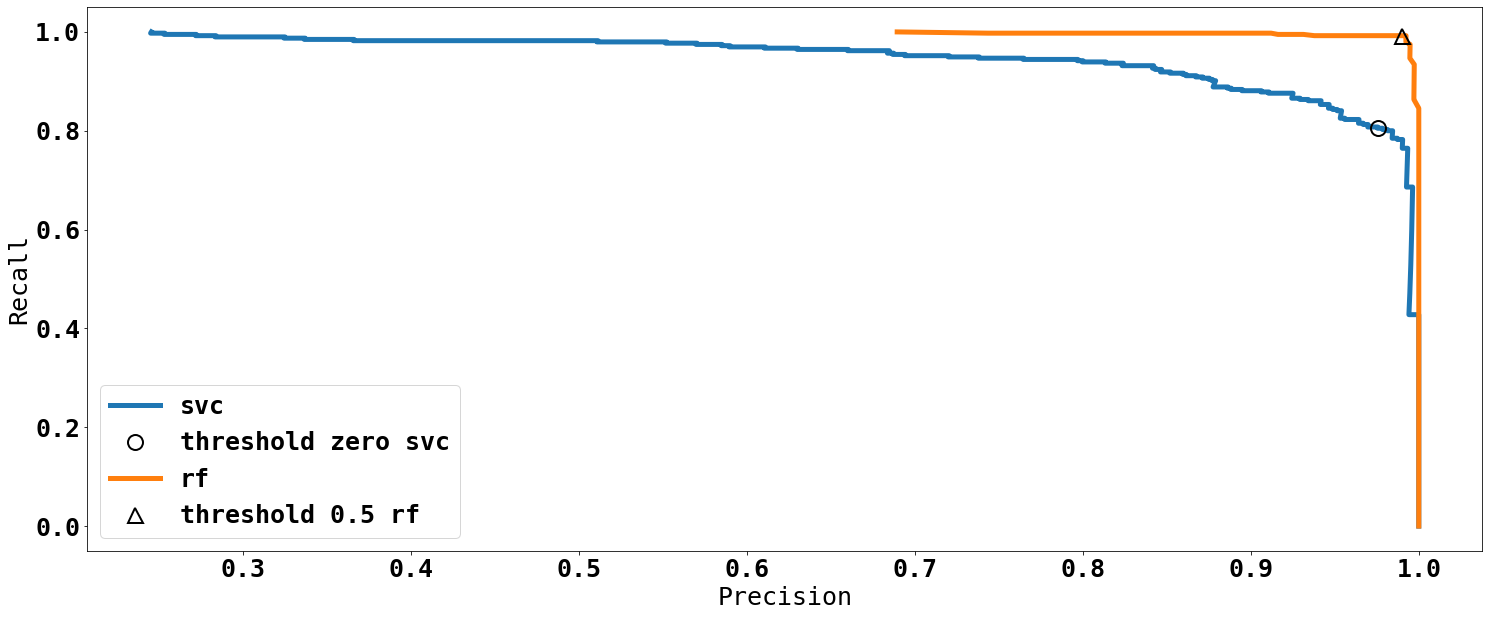

In [110]:
plot_pre_rec()

In [102]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.998
Average precision of svc: 0.959


Average precision of random forest: 0.998
Average precision of svc: 0.959

In [103]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^',
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

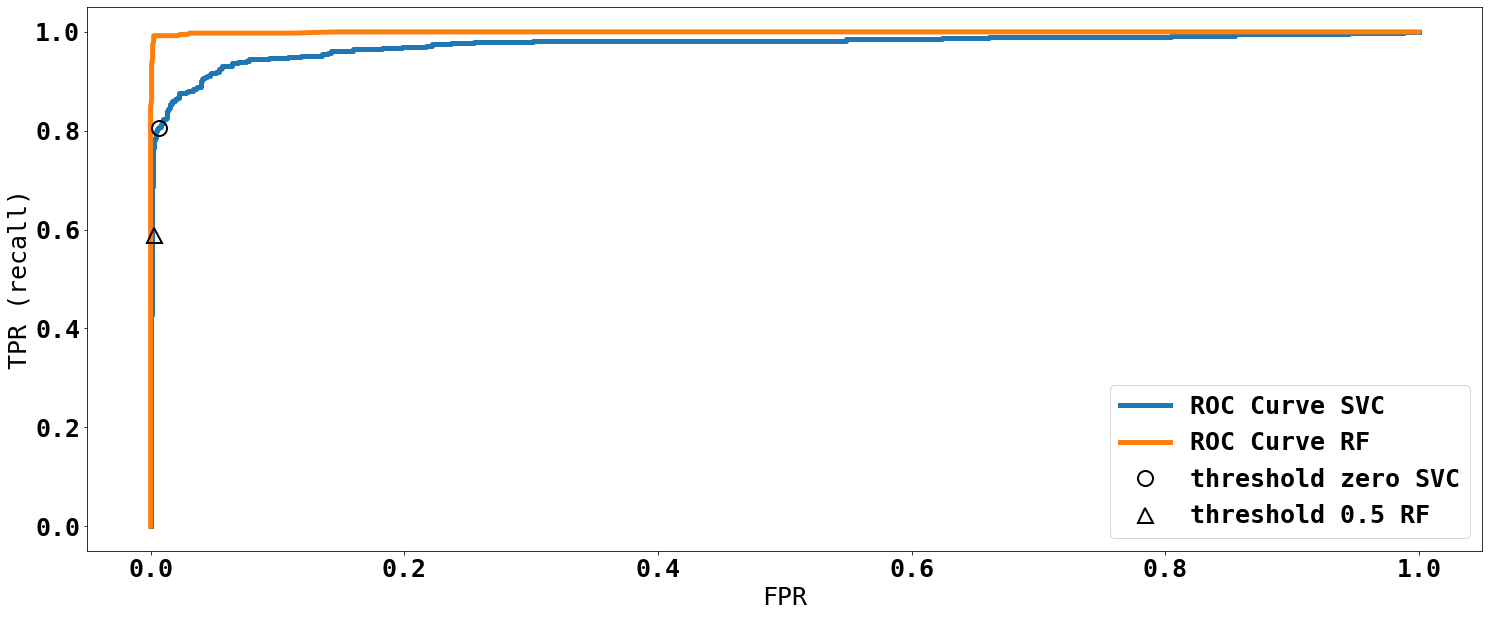

In [104]:
plot_roc_curve()

In [105]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.999
AUC for SVC: 0.975


AUC for Random Forest: 0.999
AUC for SVC: 0.975


AUC is a better metric for imbalanced classification problems than accuracy.

Using Evaluation Metrics in Model Selection

In [106]:
X_bin = wines.loc[:,wines.columns !="color"].values
y_bin = wines.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.01}
Best cross-validation score (accuracy)): 0.944
Test set AUC: 0.972
Test set accuracy: 0.943


In [ ]:
Grid-Search with accuracy
Best parameters: {'gamma': 0.01}
Best cross-validation score (accuracy)): 0.944
Test set AUC: 0.972
Test set accuracy: 0.943

In [107]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.1}
Best cross-validation score (AUC): 0.970
Test set AUC: 0.978
Test set accuracy: 0.978


Grid-Search with AUC
Best parameters: {'gamma': 0.1}
Best cross-validation score (AUC): 0.970
Test set AUC: 0.978
Test set accuracy: 0.978